## 6.2 2차원 입력 2클래스 분류

6.2.1 문제 설정

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 데이터 생성
np.random.seed(seed =1) # 난수 고정
N = 100 # 데이터 수
K = 3 # 분포 수
T3 = np.zeros((N,3), dtype =np.uint8)
T2 = np.zeros((N,2), dtype =np.uint8)
X = np.zeros((N,2))
X_range0 = [-3, 3] # X0 범위 표시용
X_range1 = [-3, 3] # X1 범위 표시용
Mu = np.array([ [-.5, -.5], [.5, 1.0], [1, -.5] ]) # 분포의 중심
Sig = np.array([ [.7, .7], [.8, .3], [.3, .8] ]) # 분포의 분산
Pi = np.array([0.4, 0.8, 1]) # 각 분포에 대한 비율 0.4 0.8 1  
                            # 어떤 클래스에 소속하는 확률Pi = np.array([0.4,0.8,1]로 설정
for n in range(N):
  wk = np.random.rand()  # 난수 생성
  for k in range(K):
    if wk < Pi[k]:
      T3[n, k] = 1 # Pi[0] 보다 작으면 클래스 0, Pi[1] 보다 작으면 클래스 1, Pi[2]보다 작으면 클래스2
      break
  for k in range(2):
    X[n, k] = (np.random.randn() * Sig[T3[n, :] == 1,k] + Mu[T3[n, :] == 1, k] )
T2[:, 0] = T3[:, 0]
T2[:, 1] = T3[:, 1] | T3[:, 2]   

입력데이터 X의 첫 5개 출력

In [3]:
print(X[:5,:])

[[-0.14173827  0.86533666]
 [-0.86972023 -1.25107804]
 [-2.15442802  0.29474174]
 [ 0.75523128  0.92518889]
 [-1.10193462  0.74082534]]


클래스 데이터 T2의 처음 5개 출력

In [4]:
print(T2[:5,:])

[[0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]]


클래스 데이터 T3의 처음 5개 출력

In [5]:
print(T3[:5,:])

[[0 1 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]]


T2,T3 그림으로 그리기

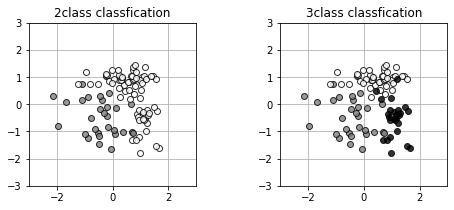

input data
[[-0.14173827  0.86533666]
 [-0.86972023 -1.25107804]
 [-2.15442802  0.29474174]
 [ 0.75523128  0.92518889]
 [-1.10193462  0.74082534]]
 
T2 class data
[[0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]]
 
T3 class data
[[0 1 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]]


In [6]:
# 데이터 표시

def show_data2(x,t):
  wk, K = t.shape
  c = [ [.5, .5, .5], [1,1,1], [0,0,0] ]
  for k in range(K):
    plt.plot( x[t[:, k] == 1, 0], x[t[:, k] == 1,1], linestyle='none', markeredgecolor='black', marker='o', color=c[k], alpha=0.8 )
    plt.grid(True)

# 메인
plt.figure(figsize=(7.5,3))
plt.subplots_adjust(wspace=0.5)
plt.subplot(1,2,1)
plt.title("2class classfication")
show_data2(X, T2)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.subplot(1,2,2)
plt.title("3class classfication")
show_data2(X, T3)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.show()  # 클래스마다 각각 다른 가우스 분포로 입력 데이터 생성
print("input data")
print(X[:5,:])
print(" ")
print("T2 class data")
print(T2[:5,:])
print(" ")
print("T3 class data")
print(T3[:5,:])

6.2.2 로지스틱 회귀 모델


In [7]:
# 로지스틱 회귀 모델
def logistic2(x0, x1, w):
  y = 1 / (1 + np.exp(-(w[0] * x0 + w[1] * x1 + w[2])))
  return y

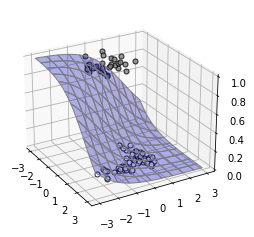

In [8]:
# 모델 3D 보기
from mpl_toolkits.mplot3d import axes3d

def show3d_logistic2(ax, w):
  xn = 50 # 매개 변수의 분할 수
  x0 = np.linspace(X_range0[0], X_range0[1], xn)
  x1 = np.linspace(X_range1[0], X_range1[1], xn)
  xx0, xx1 = np.meshgrid(x0, x1)
  y = logistic2(xx0, xx1, w)
  ax.plot_surface(xx0, xx1, y, color='blue', edgecolor='gray', rstride=5, cstride=5, alpha=0.3)

def show_data2_3d(ax, x, t):
  c = [ [.5, .5, .5], [1,1,1] ]
  for i in range(2):
    ax.plot( x[t[:, i] == 1, 0], x[t[:, i] == 1, 1], 1 - i, marker='o', color=c[i], markeredgecolor='black', linestyle='none', markersize=5, alpha=0.8 )
  Ax.view_init(elev=25, azim=-30)

# test
Ax = plt.subplot(1,1,1,projection='3d')
W=[-1, -1, -1]    # 이를 선택한 경우 2차원 로지스틱 회귀 모델과 데이터를 3차원으로 표시
show3d_logistic2(Ax, W)
show_data2_3d(Ax,X,T2)

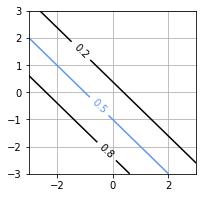

In [9]:
# 모델 등고선 2D 표시

def show_contour_logistic2(w):
  xn = 30 # 매개 변수의 분할 수
  x0 = np.linspace(X_range0[0], X_range0[1], xn)
  x1 = np.linspace(X_range1[0], X_range1[1], xn)
  xx0, xx1 = np.meshgrid(x0, x1)
  y = logistic2(xx0, xx1, w)
  cont = plt.contour(xx0, xx1, y, levels=(0.2, 0.5, 0.8), colors=['k', 'cornflowerblue', 'k'])
  cont.clabel(fmt='%1.1f', fontsize=10)
  plt.grid(True)

#test
plt.figure(figsize=(3,3))
W = [-1, -1, -1]        # 이를 선택한 경우 로지스틱회귀 모델의 출력이 등고선으로 표시
show_contour_logistic2(W)

In [10]:
# 상호 엔트로피 오차
def cee_logistic2(w,x,t):
  X_n = x.shape[0]
  y = logistic2( x[:, 0], x[:, 1], w )
  cee = 0
  for n in range(len(y)):
    cee = cee - ( t[n, 0] * np.log(y[n]) + ( 1 - t[n,0]) * np.log( 1 - y[n]) )
  cee = cee / X_n
  return cee

In [11]:
# 상호 엔트로피 오차의 미분
def dcee_logistic2(w,x,t):
  X_n = x.shape[0]
  y = logistic2( x[:,0], x[:,1], w )
  dcee = np.zeros(3)
  for n in range(len(y)):
    dcee[0] = dcee[0] + ( y[n] - t[n, 0] ) * x[n, 0] # w0에 대한 편미분
    dcee[1] = dcee[1] + ( y[n] - t[n, 0] ) * x[n, 1] # w1에  대한 편미분
    dcee[2] = dcee[2] + ( y[n] - t[n, 0] )           # w2에 대한 편미분
  dcee = dcee / X_n
  return dcee

# test
W = [-1, -1, -1]
dcee_logistic2(W, X, T2)

array([ 0.10272008,  0.04450983, -0.06307245])

w0 = -3.70, w1 = -2.54, w2 = -0.28
CEE = 0.22


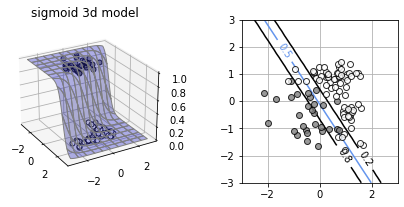

In [12]:
from scipy.optimize import minimize

# 로지스틱 회귀 모델의 매개 변수 검색
def fit_logistic2(w_init, x, t):
  res = minimize(cee_logistic2, w_init, args=(x,t), jac=dcee_logistic2, method='CG')
  return res.x

# 메인
plt.figure(1, figsize=(7,3))
plt.subplots_adjust(wspace=0.5)

Ax = plt.subplot(1,2,1,projection='3d')
W_init = [-1, 0, 0]
W = fit_logistic2(W_init, X, T2)
print("w0 = {0:.2f}, w1 = {1:.2f}, w2 = {2:.2f}".format( W[0], W[1], W[2] ))
plt.title("sigmoid 3d model")
show3d_logistic2(Ax, W)

show_data2_3d(Ax, X, T2)
cee = cee_logistic2(W, X, T2)
print("CEE = {0:.2f}".format(cee))

Ax = plt.subplot(1,2,2)
show_data2(X, T2)
show_contour_logistic2(W)

plt.show()

## 6.3 2차원 입력 3클래스 분류

6.3.1 3클래스 분류 로지스틱 회귀 모델

In [13]:
# 3클래스용 로지스틱 회귀 모델

def logistic3(x0, x1, w):
  K = 3
  w = w.reshape((3,3))
  n = len(x1)
  y = np.zeros((n,K))
  for k in range(K):
    y[:, k] = np.exp( w[k, 0] * x0 + w[k, 1] * x1 + w[k, 2] )
  wk = np.sum(y, axis=1)
  wk = y.T / wk
  y = wk.T
  return y

# test
W = np.array( [1,2,3,4,5,6,7,8,9] ) #minize 대응하기 위한 요소 수 9개의 벡터로 취급
y = logistic3( X[:3, 0], X[:3, 1], W ) # 위부터 3개의 입력 데이터 X[:3,0]와 
                                    #시험적으로 결정한 W에 대한 출력을 확인
print(np.round(y,3))

[[0.    0.006 0.994]
 [0.965 0.033 0.001]
 [0.925 0.07  0.005]]


6.3.2 교차 엔트로피 오차

In [14]:
# 교차 엔트로피 오차를 계산하는 함수 정의하기

def cee_logistic3(w,x,t):
  X_n = x.shape[0]
  y = logistic3( x[:, 0], x[:, 1], w )
  cee = 0
  N, K = y.shape

  for n in range(N): # 함수 계산
    for k in range(K): 
      cee = cee - ( t[n, k] * np.log(y[n, k]) )  
  cee = cee / X_n
  return cee

# test
W = np.array([1,2,3,4,5,6,7,8,9])
cee_logistic3(W,X,T3)

3.9824582404787288

6.3.3 경사 하강법에 의한 해

In [15]:
# 교차 엔트로피 오차의 미분

def dcee_logistic3(w,x,t):
  X_n = x.shape[0]
  y = logistic3( x[:, 0], x[:, 1], w )
  dcee = np.zeros((3,3)) #(클래스의 수 K) * (x의 차원 D+1)
  N, K = y.shape
  
  for n in range(N): # 소프트 맥스 함수의 미분 계산
    for k in range(K):
      dcee[k, :] = dcee[k, :] - ( t[n,k] - y[n,k] ) * np.r_[ x[n, :], 1 ]
  dcee = dcee / X_n
  return dcee.reshape(-1)

# test
W = np.array([1,2,3,4,5,6,7,8,9])
dcee_logistic3(W,X,T3)

array([ 0.03778433,  0.03708109, -0.1841851 , -0.21235188, -0.44408101,
       -0.38340835,  0.17456754,  0.40699992,  0.56759346])

In [16]:
# 매개 변수 검색
def fit_logistic3(w_init, x, t):
    res  = minimize(cee_logistic3, w_init, args = (x,t), jac = dcee_logistic3, method="CG")
    return res.x # minimize()에 전달하여 매개 변수 검색을 수행하는 함수 만듬

In [17]:
# 모델 등고선 2D 표시하는 함수 생성

def show_contour_logistic3(w):
  xn = 30 #매개 변수의 분할 수
  x0 = np.linspace(  X_range0[0], X_range0[1], xn )
  x1 = np.linspace(  X_range1[0], X_range1[1], xn )

  xx0, xx1 = np.meshgrid(x0, x1)
  y = np.zeros( (xn, xn, 3) )
  for i in range(xn):
    wk = logistic3(xx0[:, i], xx1[:, i], w)
    for j in range(3):
      y[:, i, j] = wk[:, j]
  for j in range(3):
    cont = plt.contour(xx0, xx1, y[:, :, j], levels=(0.5, 0.9), colors=['cornflowerblue', 'k'])
    cont.clabel(fmt='%1.1f', fontsize=9)
  plt.grid(True)

위 함수는 가중치 매개 변수 w를 전달하면, 표시할 입력 공간을 30X30으로 분할하여 모든 입력에 대해 네트워크의 출력을 확인합니다.각각의 카테고리에서 0.5 또는 0.9이상의 출력을 얻을 수 있는 영역을 등고선으로 표시

[[-3.2  -2.69  2.25]
 [-0.49  4.8  -0.69]
 [ 3.68 -2.11 -1.56]]
CEE = 0.23


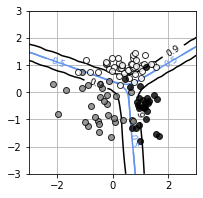

In [18]:
# 메인
W_init = np.zeros((3,3))
W = fit_logistic3(W_init, X, T3)
print( np.round( W.reshape((3,3)), 2) )
cee = cee_logistic3(W, X, T3)
print("CEE = {0:.2f}".format(cee))
plt.figure(figsize=(3,3))
show_data2(X, T3)
show_contour_logistic3(W)
plt.show()

이 모델은 모호성을 조건부 확률(사후 확률)로 근사하는 것.